## Visualización de los datos

## Evolución de metascore a lo largo de los años

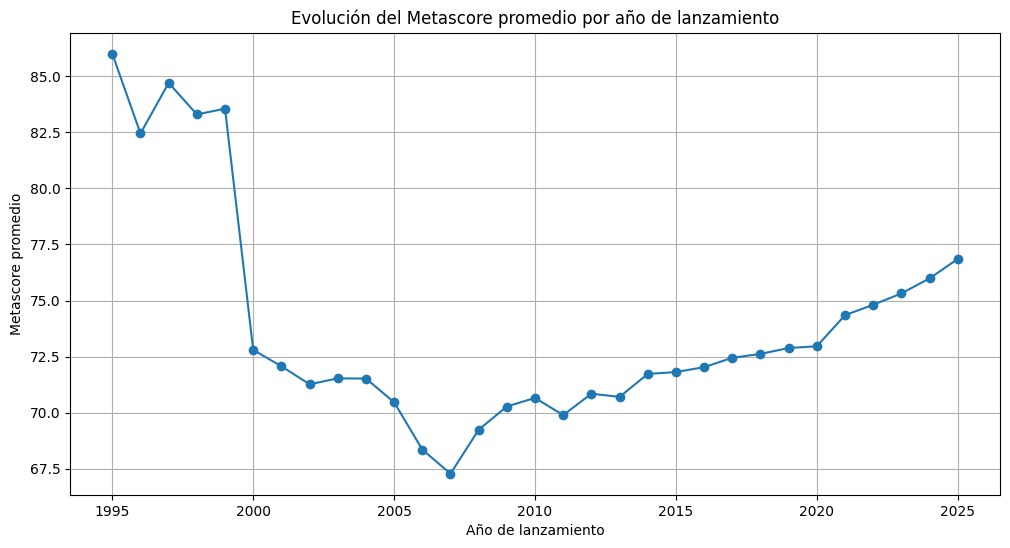

In [ ]:
# Graficar la evolución del metascore (score) a lo largo del tiempo
import matplotlib.pyplot as plt

# Extraer año de release_date
df_clean['year'] = df_clean['release_date'].dt.year

# Agrupar por año y calcular promedio de metascore
score_by_year = df_clean.groupby('year')['metascore'].mean()

plt.figure(figsize=(12,6))
plt.plot(score_by_year.index, score_by_year.values, marker='o')
plt.title('Evolución del Metascore promedio por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Metascore promedio')
plt.grid(True)
plt.show()

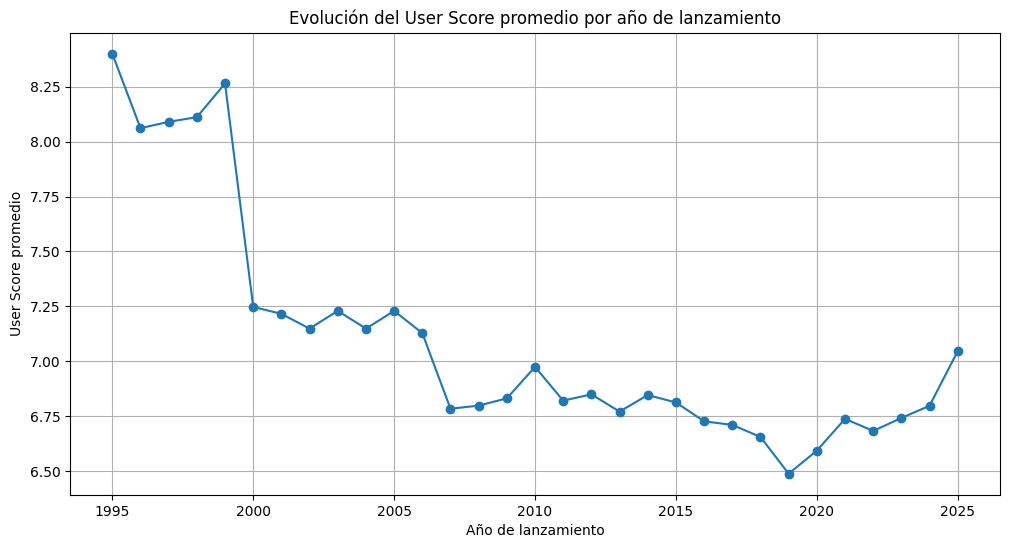

In [ ]:
# Graficar la evolución del metascore (score) a lo largo del tiempo
import matplotlib.pyplot as plt

# Extraer año de release_date
df_clean['year'] = df_clean['release_date'].dt.year

# Agrupar por año y calcular promedio de score
score_by_year = df_clean.groupby('year')['user_score'].mean()

plt.figure(figsize=(12,6))
plt.plot(score_by_year.index, score_by_year.values, marker='o')
plt.title('Evolución del User Score promedio por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('User Score promedio')
plt.grid(True)
plt.show()